In [1]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [5]:
X, y = make_regression(n_samples=1500, n_features=6, n_informative=2)

print(X.shape, y.shape)

(1500, 6) (1500,)


In [7]:
fs = SelectKBest(score_func=f_regression, k=2)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1500, 2)


In [9]:
import pandas as pd
df = pd.DataFrame(X)
df_corr = df.corr()
df_corr

,0,1,2,3,4,5
0,1.000000,-0.027290,0.020017,0.023940,-0.001870,-0.044139
1,-0.027290,1.000000,-0.024038,-0.031112,0.005144,-0.001078
2,0.020017,-0.024038,1.000000,0.053391,-0.020828,0.008913
3,0.023940,-0.031112,0.053391,1.000000,-0.021669,-0.020996
4,-0.001870,0.005144,-0.020828,-0.021669,1.000000,-0.017008
5,-0.044139,-0.001078,0.008913,-0.020996,-0.017008,1.000000


Matplotlib is building the font cache; this may take a moment.


<Axes: >

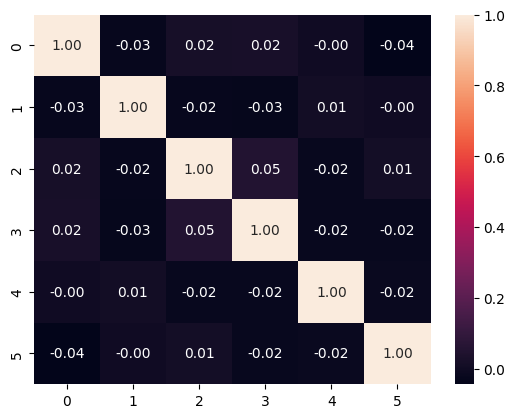

In [10]:
import seaborn as sns
sns.heatmap (df_corr, annot=df_corr, fmt='.2f')

In [11]:
dy = pd.Series(y)
Xy_corr = df.corrwith(dy)
Xy_corr

0   -0.048359
1    0.799188
2   -0.013869
3   -0.037505
4   -0.006109
5    0.600219
dtype: float64

In [12]:
print(fs.get_support())

[False  True False False False  True]


In [13]:
print(fs.scores_)

[3.51136322e+00 2.64816209e+03 2.88211589e-01 2.11006800e+00
 5.59004267e-02 8.43585528e+02]


In [14]:
print(fs.pvalues_)

[6.11438180e-002 0.00000000e+000 5.91448595e-001 1.46542239e-001
 8.13129240e-001 1.70070384e-147]


[2648.16209494  843.58552848]


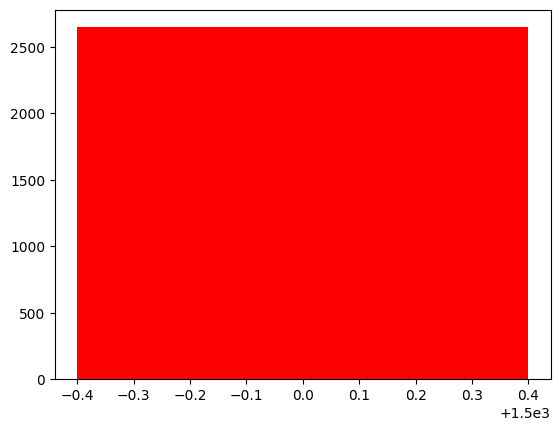

In [32]:
import numpy as np
from matplotlib import pyplot as plt

# Get the indices sorted by most important to least important
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(2):
    features.append(len(X[:, indices[i]]))

print(fs.scores_[indices[range(2)]])

# Now plot
plt.figure()
plt.bar(features, fs.scores_[indices[range(2)]], color='r', align='center')
plt.show()
